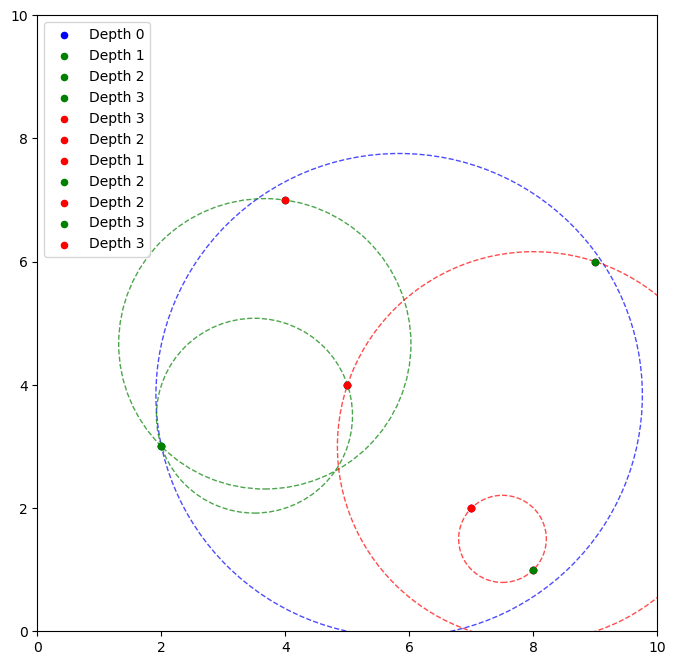

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class BallTreeNode:
    def __init__(self, points, centroid=None, radius=None, left=None, right=None):
        self.points = points
        self.centroid = centroid
        self.radius = radius
        self.left = left
        self.right = right

def build_ball_tree(points):
    """
    Recursively builds a ball tree from a given set of points.
    """
    if len(points) == 0:
        return None
    
    # Compute centroid of the current points
    centroid = np.mean(points, axis=0)
    
    # Compute the radius (max distance to centroid)
    radius = np.max(np.linalg.norm(points - centroid, axis=1))
    
    # Stop splitting if there's only one point
    if len(points) == 1:
        return BallTreeNode(points, centroid, radius)
    
    # Find farthest pair of points to split
    pairwise_distances = np.linalg.norm(points[:, None] - points[None, :], axis=2)
    farthest_points = np.unravel_index(np.argmax(pairwise_distances), pairwise_distances.shape)
    p1, p2 = points[farthest_points[0]], points[farthest_points[1]]
    
    # Partition points into two clusters based on proximity to p1 or p2
    left_points = points[np.linalg.norm(points - p1, axis=1) <= np.linalg.norm(points - p2, axis=1)]
    right_points = points[np.linalg.norm(points - p1, axis=1) > np.linalg.norm(points - p2, axis=1)]
    
    # Recursively build left and right subtrees
    left = build_ball_tree(left_points)
    right = build_ball_tree(right_points)
    
    return BallTreeNode(points, centroid, radius, left, right)

def plot_ball_tree(node, ax=None, depth=0, color='blue'):
    """
    Plots the ball tree as a series of nested circles.
    """
    if node is None:
        return
    
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 8))
        ax.set_title("Ball Tree Visualization")
        ax.set_xlabel("x1 (Dimension 1)")
        ax.set_ylabel("x2 (Dimension 2)")
        ax.grid(True)
    
    # Draw the ball (circle) for the current node
    circle = plt.Circle(node.centroid, node.radius, color=color, fill=False, linestyle='--', alpha=0.7)
    ax.add_artist(circle)
    ax.scatter(node.points[:, 0], node.points[:, 1], label=f"Depth {depth}", s=20, color=color)

    # Recursively plot left and right subtrees
    plot_ball_tree(node.left, ax=ax, depth=depth + 1, color='green')
    plot_ball_tree(node.right, ax=ax, depth=depth + 1, color='red')

# Example dataset
points = np.array([
    [2, 3],
    [5, 4],
    [9, 6],
    [4, 7],
    [8, 1],
    [7, 2]
])

# Build the ball tree
ball_tree_root = build_ball_tree(points)

# Plot the ball tree
fig, ax = plt.subplots(figsize=(8, 8))
plot_ball_tree(ball_tree_root, ax=ax)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()
plt.show()


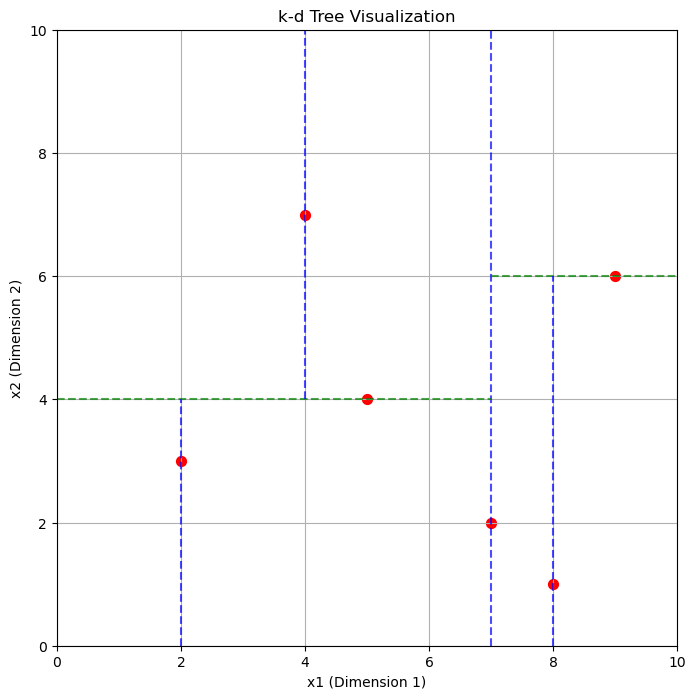

In [3]:
class KDTreeNode:
    def __init__(self, point=None, left=None, right=None, axis=None):
        self.point = point
        self.left = left
        self.right = right
        self.axis = axis

def build_kd_tree(points, depth=0):
    """
    Recursively builds a k-d tree from the given points.
    """
    if len(points) == 0:
        return None

    # Select axis based on depth (0 for x-axis, 1 for y-axis)
    k = points.shape[1]
    axis = depth % k

    # Sort points along the selected axis
    sorted_points = points[points[:, axis].argsort()]

    # Select the median point
    median_index = len(sorted_points) // 2

    # Create node and recursively construct left and right subtrees
    return KDTreeNode(
        point=sorted_points[median_index],
        left=build_kd_tree(sorted_points[:median_index], depth + 1),
        right=build_kd_tree(sorted_points[median_index + 1:], depth + 1),
        axis=axis
    )

def plot_kd_tree(node, ax, bounds, depth=0):
    """
    Visualizes the k-d tree by plotting splitting lines and points.
    """
    if node is None:
        return

    # Get axis for the current split (0 for x-axis, 1 for y-axis)
    axis = node.axis
    x_min, x_max, y_min, y_max = bounds

    # Plot splitting line
    if axis == 0:  # Vertical line (x-axis split)
        ax.axvline(x=node.point[0], ymin=y_min / 10, ymax=y_max / 10, color='blue', linestyle='--', alpha=0.7)
        # Recursively plot left and right branches with updated bounds
        plot_kd_tree(node.left, ax, (x_min, node.point[0], y_min, y_max), depth + 1)
        plot_kd_tree(node.right, ax, (node.point[0], x_max, y_min, y_max), depth + 1)
    else:  # Horizontal line (y-axis split)
        ax.axhline(y=node.point[1], xmin=x_min / 10, xmax=x_max / 10, color='green', linestyle='--', alpha=0.7)
        # Recursively plot left and right branches with updated bounds
        plot_kd_tree(node.left, ax, (x_min, x_max, y_min, node.point[1]), depth + 1)
        plot_kd_tree(node.right, ax, (x_min, x_max, node.point[1], y_max), depth + 1)

    # Plot the current point
    ax.scatter(*node.point, s=50, color='red')

# Example dataset
points = np.array([
    [2, 3],
    [5, 4],
    [9, 6],
    [4, 7],
    [8, 1],
    [7, 2]
])

# Build the k-d tree
kd_tree_root = build_kd_tree(points)

# Plot the k-d tree
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("k-d Tree Visualization")
ax.set_xlabel("x1 (Dimension 1)")
ax.set_ylabel("x2 (Dimension 2)")
ax.grid(True)

plot_kd_tree(kd_tree_root, ax, (0, 10, 0, 10))
plt.show()


Fetching MNIST dataset...
Reducing dimensionality of MNIST dataset...


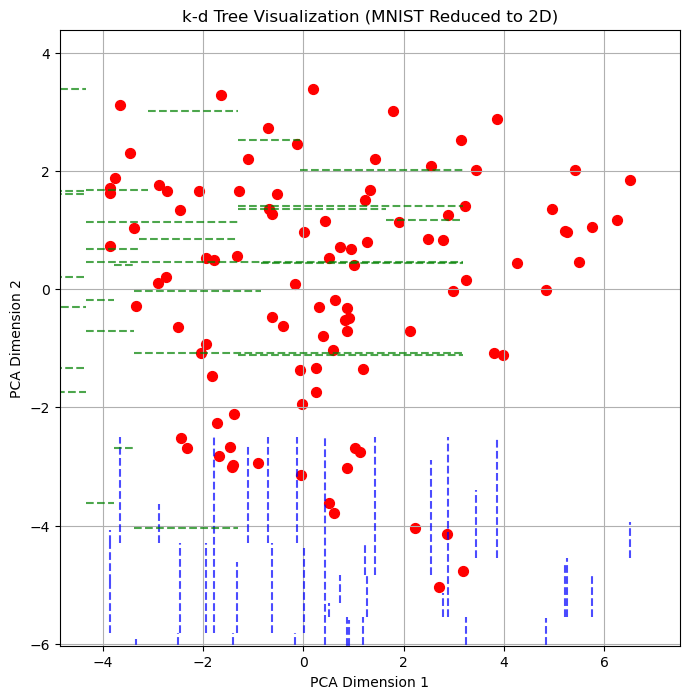

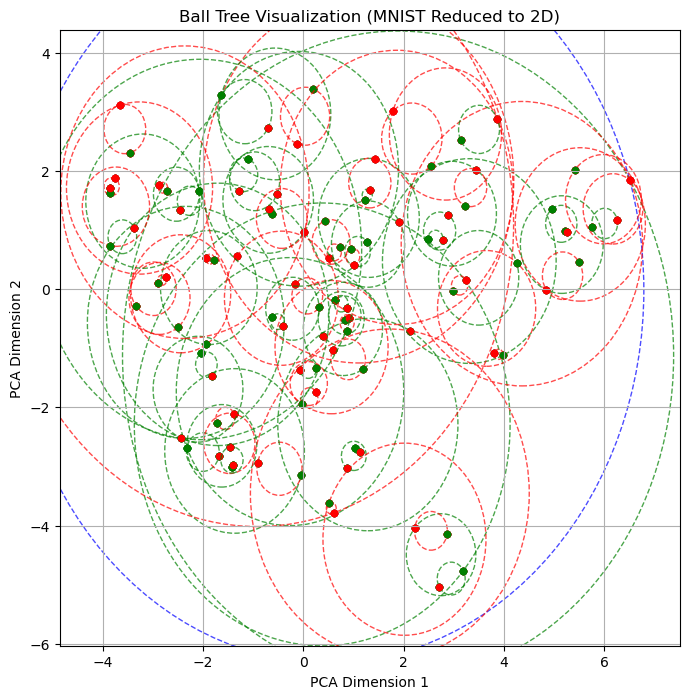

In [9]:
# Step 1: Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Fetch and preprocess the MNIST dataset
print("Fetching MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(int)  # Convert labels to integers

# Step 3: Reduce dimensionality to 2D
print("Reducing dimensionality of MNIST dataset...")
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Step 4: Subsample data for visualization
sample_size = 100  # Take a smaller subset for clarity
indices = np.random.choice(range(X_reduced.shape[0]), size=sample_size, replace=False)
X_sample = X_reduced[indices]
y_sample = y[indices]

# Step 5: Define k-d tree and ball tree methods (reuse from previous code)
# Include `build_kd_tree`, `plot_kd_tree`, `build_ball_tree`, and `plot_ball_tree` functions.

# Build and visualize the k-d tree
kd_tree_sample_root = build_kd_tree(X_sample)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("k-d Tree Visualization (MNIST Reduced to 2D)")
ax.set_xlabel("PCA Dimension 1")
ax.set_ylabel("PCA Dimension 2")
ax.set_xlim(X_sample[:, 0].min() - 1, X_sample[:, 0].max() + 1)
ax.set_ylim(X_sample[:, 1].min() - 1, X_sample[:, 1].max() + 1)
ax.grid(True)
plot_kd_tree(kd_tree_sample_root, ax, bounds=(X_sample[:, 0].min(), X_sample[:, 0].max(),
                                              X_sample[:, 1].min(), X_sample[:, 1].max()))
plt.show()

# Build and visualize the ball tree
ball_tree_sample_root = build_ball_tree(X_sample)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Ball Tree Visualization (MNIST Reduced to 2D)")
ax.set_xlabel("PCA Dimension 1")
ax.set_ylabel("PCA Dimension 2")
ax.set_xlim(X_sample[:, 0].min() - 1, X_sample[:, 0].max() + 1)
ax.set_ylim(X_sample[:, 1].min() - 1, X_sample[:, 1].max() + 1)
ax.grid(True)
plot_ball_tree(ball_tree_sample_root, ax=ax)
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Step 2: Fetch and preprocess the MNIST dataset
print("Fetching MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(int)  # Convert labels to integers

# Euclidean distance function
def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Ball Tree Node structure
class BallTreeNode:
    def __init__(self, points, labels, centroid=None, radius=None, left=None, right=None):
        self.points = points
        self.labels = labels  # Store labels corresponding to the points
        self.centroid = centroid
        self.radius = radius
        self.left = left
        self.right = right

# Fix max to properly unpack the neighbors (which contain distance, point, and label)
def ball_tree_query(node, query_point, k, neighbors):
    if node is None:
        return
    
    # Calculate the distance from the query point to the centroid of the current node
    distance = euclidean_distance(query_point, node.centroid)
    
    # Add the current node's points to the neighbors list
    for point, label in zip(node.points, node.labels):
        neighbor_distance = euclidean_distance(query_point, point)  # Use Euclidean distance
        neighbors.append((neighbor_distance, point, label))
    
    # If the number of neighbors exceeds k, remove the farthest neighbor
    if len(neighbors) > k:
        # Find the farthest neighbor
        neighbors.sort(key=lambda x: x[0], reverse=True)
        neighbors.pop()  # Remove the farthest neighbor
    
    # Recursively query left and right subtrees
    if node.left:
        ball_tree_query(node.left, query_point, k, neighbors)
    if node.right:
        ball_tree_query(node.right, query_point, k, neighbors)
        
def build_ball_tree(points, labels):
    """
    Recursively builds a ball tree from a given set of points.
    """
    if len(points) == 0:
        return None
    
    # Compute centroid of the current points
    centroid = np.mean(points, axis=0)
    
    # Compute the radius (max distance to centroid)
    radius = np.max(np.linalg.norm(points - centroid, axis=1))
    
    # Stop splitting if there's only one point
    if len(points) == 1:
        return BallTreeNode(points, labels, centroid, radius)
    
    # Find farthest pair of points to split
    pairwise_distances = np.linalg.norm(points[:, None] - points[None, :], axis=2)
    farthest_points = np.unravel_index(np.argmax(pairwise_distances), pairwise_distances.shape)
    p1, p2 = points[farthest_points[0]], points[farthest_points[1]]
    
    # Partition points into two clusters based on proximity to p1 or p2
    left_points = points[np.linalg.norm(points - p1, axis=1) <= np.linalg.norm(points - p2, axis=1)]
    right_points = points[np.linalg.norm(points - p1, axis=1) > np.linalg.norm(points - p2, axis=1)]
    
    left_labels = labels[np.linalg.norm(points - p1, axis=1) <= np.linalg.norm(points - p2, axis=1)]
    right_labels = labels[np.linalg.norm(points - p1, axis=1) > np.linalg.norm(points - p2, axis=1)]
    
    # Recursively build left and right subtrees
    left = build_ball_tree(left_points, left_labels)
    right = build_ball_tree(right_points, right_labels)
    
    return BallTreeNode(points, labels, centroid, radius, left, right)

def knn_with_ball_tree(tree_root, train_labels, test_data, k=3):
    """
    Predict labels for test data using k-NN and Ball Tree.
    
    Parameters:
    - tree_root: Root of the Ball Tree.
    - train_labels: Labels for the training data.
    - test_data: Array of test points.
    - k: Number of neighbors to consider.
    
    Returns:
    - predictions: Array of predicted labels.
    """
    predictions = []
    for query_point in test_data:
        neighbors = []
        ball_tree_query(tree_root, query_point, k, neighbors)
        
        # Retrieve labels of nearest neighbors
        neighbor_labels = [label for _, _, label in neighbors]
        
        # Majority vote for the predicted label
        predicted_label = max(set(neighbor_labels), key=neighbor_labels.count)
        predictions.append(predicted_label)
    
    return np.array(predictions)

# Example dataset
print("Subsampling dataset for testing...")
sample_size = 1000  # Use a smaller sample size for training/testing
X_train, X_test, y_train, y_test = train_test_split(X[:sample_size], y[:sample_size], test_size=0.3, random_state=42)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

# Build the Ball Tree with training data
print("Building Ball Tree...")
ball_tree_root = build_ball_tree(X_train, y_train)

# # Test k-NN with Ball Tree
print("Testing k-NN with Ball Tree...")
y_pred_ball_tree = knn_with_ball_tree(ball_tree_root, y_train, X_test, k=3)

# Calculate accuracy
accuracy_ball_tree = accuracy_score(y_test, y_pred_ball_tree)
print(f"Accuracy of k-NN with Ball Tree (k=3): {accuracy_ball_tree:.2%}")



Fetching MNIST dataset...
Subsampling dataset for testing...
Training set size: 700, Test set size: 300
Building Ball Tree...
Testing k-NN with Ball Tree...
Accuracy of k-NN with Ball Tree (k=3): 0.67%
